In [63]:
%matplotlib inline
import numpy as np
import pandas as pd
import json
import os
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns
sns.set(color_codes=True)

In [64]:
os.chdir('..')
%pwd

'/home/jyuwei/code/WordEmbedding-SubCulture/src'

In [127]:
with open('../result/epa_expansion/nn_result_github_all', 'r') as fp:
    github = json.load(fp)
with open('../result/epa_expansion/nn_result_twitter_all', 'r') as fp:
    twitter = json.load(fp)
from sample_seeds import read_warriner_ratings
warriner = read_warriner_ratings()

In [153]:
def get_tokenset(words_list):
    from nltk.corpus import wordnet as wn 
    words_list_pos = {
        wn.VERB: [],
        wn.NOUN: [],
        wn.ADV: [],
        wn.ADJ: []
    }
    
    for word in words_list:
        for pos in words_list_pos.keys():
            if word in set(w.name().split('.', 1)[0] for w in wn.synsets(word, pos=pos)):
                words_list_pos[pos].append(word)

    return words_list_pos


def tokenset_comp(words_list_pos, bins, baseline=False):
    for pos in words_list_pos.keys():
        tokenlist = words_list_pos[pos]
        github_list = np.array([github[t] for t in set(tokenlist) & set(github.keys())])
        twitter_list = np.array([twitter[t] for t in set(tokenlist) & set(twitter.keys())])
        warriner_list = np.array([warriner[t] for t in set(tokenlist) & set(warriner.keys())])
        for axis in range(0, 3):
            plt.figure()
            plt.title('%s %s' % (pos, axis))
            sns.distplot(github_list[:, axis], color='r', bins=bins)
            sns.distplot(twitter_list[:, axis], color='b', bins=bins)
            if baseline:
                sns.distplot(warriner_list[:, axis], color='g', bins=1000)
        print('===== %s %s =====' % (pos, len(tokenlist)))
        print(np.mean(github_list, axis=0))
        print(np.mean(np.abs(github_list), axis=0))
        print(np.std(github_list, axis=0))

        print(np.mean(twitter_list, axis=0))
        print(np.mean(np.abs(twitter_list), axis=0))
        print(np.std(twitter_list, axis=0))
        
        print(np.mean(warriner_list, axis=0))
        print(np.mean(np.abs(warriner_list), axis=0))
        print(np.std(warriner_list, axis=0))

In [130]:
words_list_pos = get_tokenset(set(github.keys()) & set(twitter.keys()) & set(warriner.keys()))

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


===== a 2071 =====
[ 0.26609104  0.71448075 -1.06775077]
[0.47112272 0.75148363 1.07034794]
[0.53446922 0.40920285 0.26963217]
[ 0.19705135  0.64088181 -0.96501624]
[0.56512016 0.72321153 0.98006144]
[0.70506098 0.51557603 0.37993304]
[ 0.31982602  0.64345013 -0.673708  ]
[1.37871192 1.28513774 1.16089525]
[1.62740347 1.41240333 1.22560175]
===== n 6315 =====
[ 0.38977198  0.7680573  -1.10463594]
[0.47032183 0.78447859 1.10780707]
[0.40466944 0.30912838 0.25355698]
[ 0.32220432  0.67832862 -1.06699037]
[0.55288084 0.73217715 1.07913838]
[0.60839859 0.43342597 0.37125302]
[ 0.42596928  0.7091273  -0.78083306]
[1.17298833 1.17997693 1.23116326]
[1.39686142 1.23089162 1.23639743]
===== r 88 =====
[ 0.34469813  0.72069814 -1.1019277 ]
[0.5772719  0.78442839 1.1019277 ]
[0.65149742 0.4757574  0.35248399]
[ 0.22675479  0.59894352 -1.07760611]
[0.56517371 0.71007353 1.11356183]
[0.70216127 0.53442637 0.44911437]
[ 0.54159997  0.68267685 -1.10294463]
[0.99636114 1.05253215 1.50506315]
[1.18908

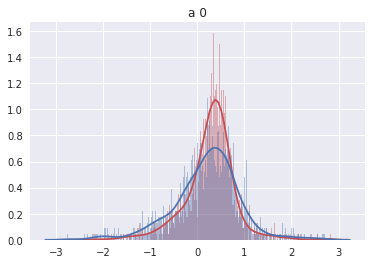

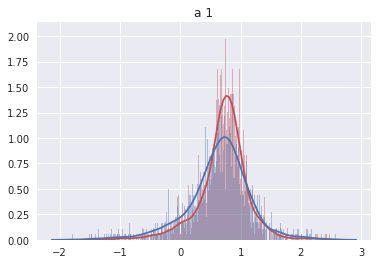

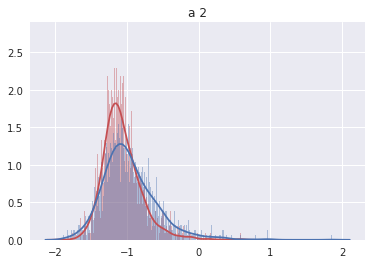

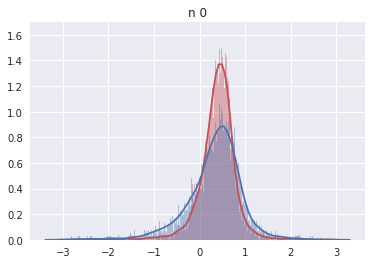

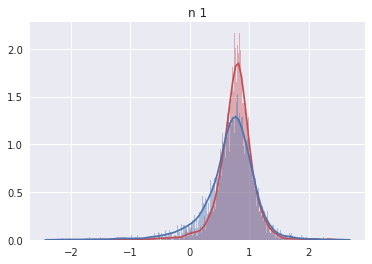

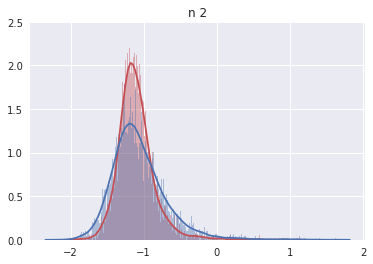

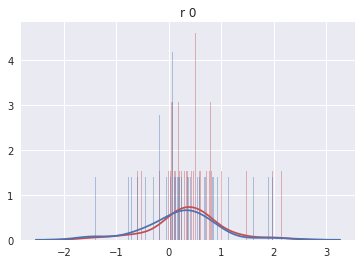

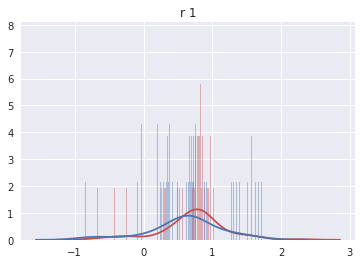

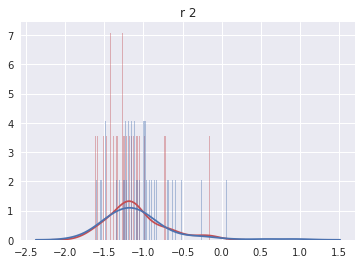

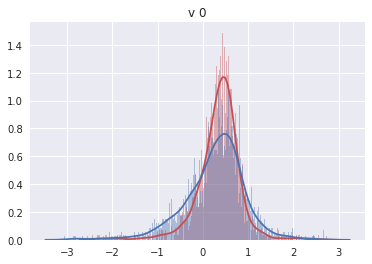

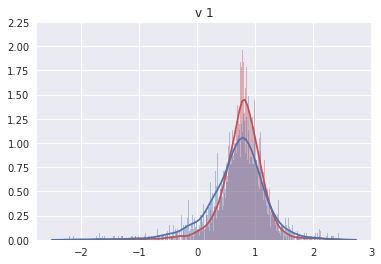

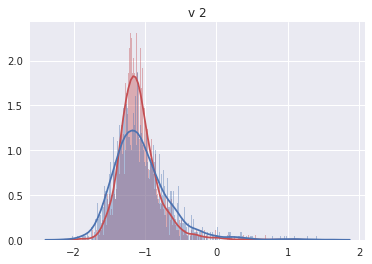

In [146]:
tokenset_comp(words_list_pos, 500)

In [138]:
%ls epa_expansion/*.txt

epa_expansion/action.txt  epa_expansion/emotions.txt


In [151]:
with open('epa_expansion/emotions.txt') as fp:
    emotions = set([line.rstrip('\n').lower() for line in fp.readlines()])
emotions = list(emotions & set(github.keys()) & set(twitter.keys()))
print(emotions)
print(len(emotions))

['stunned', 'restless', 'hopeless', 'uncomfortable', 'angry', 'bored', 'interested', 'comfortable', 'rejected', 'annoyed', 'amused', 'trust', 'hesitant', 'spiteful', 'hostile', 'eager', 'worried', 'tender', 'confused', 'anticipating', 'intrigued', 'anxious', 'nervous', 'proud', 'happy', 'fondness', 'shamed', 'depressed', 'weary', 'enthusiastic', 'horrified', 'curious', 'awkward', 'cautious', 'sad', 'helpless', 'inferior', 'insecure', 'alarmed', 'isolated', 'insulted', 'trusting', 'scared', 'excited', 'shocked', 'irritated', 'bitter', 'content', 'panicked', 'exasperated', 'amazed', 'pleased', 'sorrow', 'numb', 'hurt', 'neglected', 'receptive', 'contempt', 'afraid', 'embarrassed', 'calm', 'concern', 'satisfied', 'fearful', 'aggravated', 'relieved', 'overwhelmed', 'confident', 'dismayed', 'optimistic', 'cheerful', 'delighted', 'lonely', 'attraction', 'guilty', 'safe', 'lust', 'sympathy', 'love', 'absorbed', 'jealous', 'disappointed', 'disturbed', 'grumpy', 'brave', 'indifferent', 'caring'

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


===== emotions 101 =====
[ 0.14041086  0.68414302 -0.89256389]
[0.50305957 0.71244642 0.90592686]
[0.69788528 0.50417974 0.32864404]
[-0.12428517  0.44329822 -0.68751902]
[0.87841203 0.73096905 0.7385532 ]
[1.11492033 0.80231805 0.46125309]
[-0.24720488  0.23469371 -0.13893376]
[2.43929037 1.70737901 1.11147011]
[2.54120346 1.97797472 1.42560296]


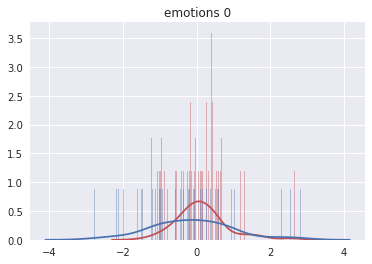

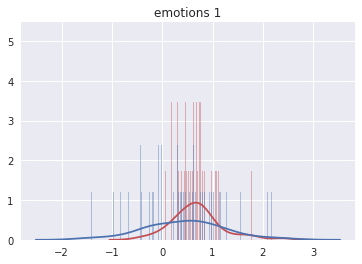

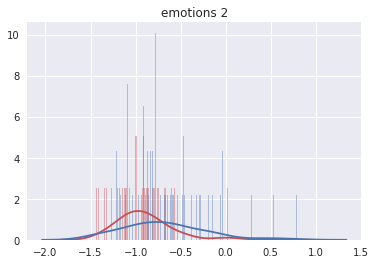

In [152]:
tokenset_comp({'emotions': emotions}, 500)

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


===== emotions 101 =====
[ 0.14041086  0.68414302 -0.89256389]
[0.50305957 0.71244642 0.90592686]
[0.69788528 0.50417974 0.32864404]
[-0.12428517  0.44329822 -0.68751902]
[0.87841203 0.73096905 0.7385532 ]
[1.11492033 0.80231805 0.46125309]
[-0.24720488  0.23469371 -0.13893376]
[2.43929037 1.70737901 1.11147011]
[2.54120346 1.97797472 1.42560296]


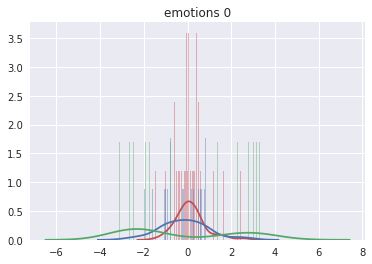

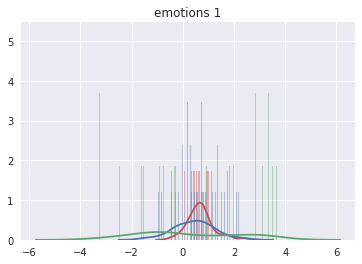

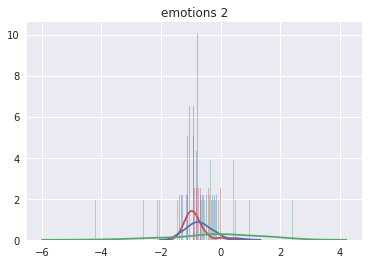

In [154]:
tokenset_comp({'emotions': emotions}, 500, True)

In [158]:
with open('epa_expansion/action.txt') as fp:
    actions = set([line.rstrip('\n').lower() for line in fp.readlines()])
actions = list(actions & set(github.keys()) & set(twitter.keys()))
print(actions)
print(len(actions))

['confer', 'describe', 'perform', 'balance', 'maximize', 'train', 'rate', 'sort', 'minimize', 'cater', 'brief', 'meet', 'straighten', 'coordinate', 'plan', 'net', 'interpret', 'repeat', 'determine', 'display', 'combine', 'consider', 'obliterate', 'contrast', 'widen', 'graph', 'relay', 'construct', 'interface', 'gather', 'transmit', 'visualize', 'intervene', 'distinguish', 'probe', 'critique', 'dispatch', 'contract', 'confirm', 'overcome', 'triple', 'yield', 'gauge', 'derive', 'tutor', 'stimulate', 'refer', 'map', 'lighten', 'accompany', 'detail', 'order', 'further', 'facilitate', 'name', 'eliminate', 'use', 'verify', 'notify', 'frame', 'register', 'assemble', 'involve', 'terminate', 'remodel', 'apply', 'win', 'treat', 'defend', 'attain', 'reproduce', 'forge', 'forward', 'measure', 'manipulate', 'advance', 'incorporate', 'bolster', 'enable', 'fulfill', 'save', 'mobilize', 'summarize', 'duplicate', 'project', 'oversee', 'foster', 'challenge', 'aid', 'blog', 'sanction', 'borrow', 'forecas

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


===== actions 619 =====
[ 0.47371219  0.97756542 -1.15524163]
[0.51995081 0.98314017 1.15582691]
[0.36839912 0.31483506 0.22741143]
[ 0.4178102   0.91660967 -1.1122721 ]
[0.57569008 0.92971013 1.11468313]
[0.55135178 0.41385526 0.32825221]
[ 0.84402709  1.46945338 -0.95892879]
[1.09100624 1.5797675  1.21447745]
[1.03301494 1.02482073 1.06085828]


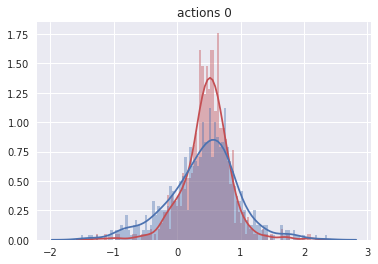

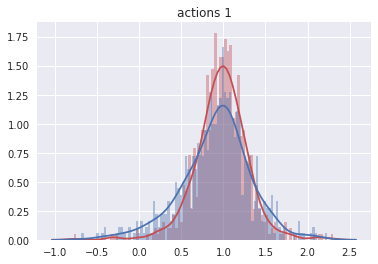

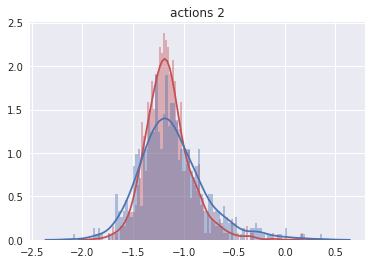

In [161]:
tokenset_comp({'actions': actions}, 100)